# 📊 Multinomial and Dirichlet Distributions
## Completing Syllabus Unit 1.1

**Course:** Advanced Machine Learning (AICC 303)  
**Unit:** 1. Probabilistic Models and Inference  
**Topic:** 1.1 Probability distributions (Multinomial, Dirichlet)

---

## 1. Multinomial Distribution

### Theory
The **Multinomial Distribution** is the generalization of the Binomial Distribution.

*   **Bernoulli:** 1 trial, 2 outcomes (Success/Failure).
*   **Binomial:** $n$ independent trials, 2 outcomes.
*   **Categorical (generalized Bernoulli):** 1 trial, $K$ outcomes (e.g., rolling a die).
*   **Multinomial:** $n$ independent trials, $K$ mutually exclusive outcomes.

### Definition
Consider an experiment with $n$ independent trials. Each trial results in exactly one of $K$ fixed categories, with probabilities $p_1, p_2, \dots, p_K$ (where $\sum p_i = 1$).

If $X_i$ indicates the number of times outcome $i$ was observed over the $n$ trials, then the vector $X = (X_1, \dots, X_K)$ follows a multinomial distribution.

$$ P(X_1=x_1, \dots, X_k=x_k) = \frac{n!}{x_1! x_2! \dots x_k!} p_1^{x_1} p_2^{x_2} \dots p_k^{x_k} $$

Subject to $\sum x_i = n$.

### Parameters
*   $n$: Number of trials.
*   $p$: Vector of probabilities $(p_1, \dots, p_K)$.

### Mean and Variance
*   **Mean of $X_i$**: $E[X_i] = n p_i$
*   **Variance of $X_i$**: $\text{Var}(X_i) = n p_i (1 - p_i)$
*   **Covariance between $X_i$ and $X_j$**: $\text{Cov}(X_i, X_j) = -n p_i p_j$
    *   *Note: Covariance is negative because if one count goes up, others must go down (since $n$ is fixed).*

--- Multinomial Simulation (Rolling a Die) ---
Total Rolls: 1000
Outcome Counts (1-6): [167 150 157 174 182 170]


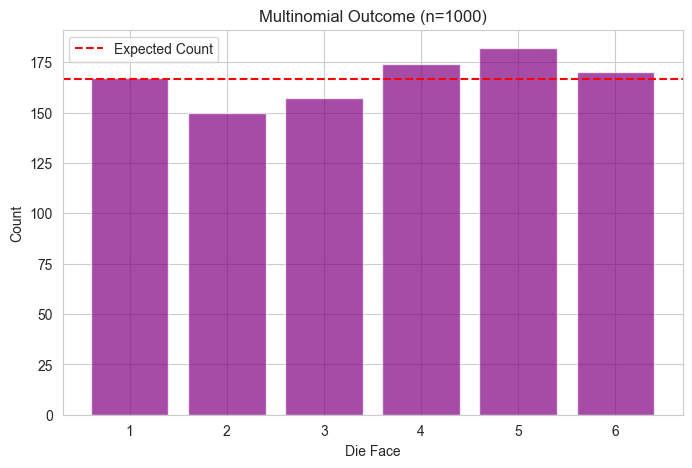

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import multinomial, dirichlet

sns.set_style("whitegrid")

def simulate_multinomial():
    print("--- Multinomial Simulation (Rolling a Die) ---")
    n_trials = 1000
    # Fair die probabilities for 6 faces
    probs = [1/6] * 6  
    
    # Run the experiment once
    outcome = multinomial.rvs(n=n_trials, p=probs)
    
    print(f"Total Rolls: {n_trials}")
    print(f"Outcome Counts (1-6): {outcome}")
    
    # Visualize
    plt.figure(figsize=(8, 5))
    faces = ['1', '2', '3', '4', '5', '6']
    plt.bar(faces, outcome, color='purple', alpha=0.7)
    plt.axhline(y=n_trials/6, color='r', linestyle='--', label='Expected Count')
    plt.title(f"Multinomial Outcome (n={n_trials})")
    plt.xlabel("Die Face")
    plt.ylabel("Count")
    plt.legend()
    plt.show()

simulate_multinomial()

### Applications in ML
1.  **Natural Language Processing (NLP):** Modeling word counts in a document (Bag of Words). The dictionary size is $K$, and document length is $n$.
2.  **Gene Sequence Analysis:** counting occurrences of DNA bases (A, C, G, T), so $K=4$.

## 2. Dirichlet Distribution

### Theory
The **Dirichlet Distribution** is a continuous multivariate probability distribution. It is the **conjugate prior** of the Multinomial distribution in Bayesian statistics.

While Multinomial models *counts* of outcomes, Dirichlet models the *probabilities* ($p_1, \dots, p_K$) themselves.

Imagine you have a factory producing loaded dice. 
*   **Multinomial:** Given a specific die, what numbers come up?
*   **Dirichlet:** What is the probability distribution of *types* of dice the factory produces (e.g., mostly fair, or mostly biased towards 6)?

### Definition
It is a distribution over the $K$-simplex (i.e., vectors $x$ where $x_i > 0$ and $\sum x_i = 1$).

$$ f(x_1, \dots, x_K; \alpha_1, \dots, \alpha_K) = \frac{1}{B(\alpha)} \prod_{i=1}^{K} x_i^{\alpha_i - 1} $$

Where $\alpha = (\alpha_1, \dots, \alpha_K)$ is the vector of concentration parameters.

### The Concentration Parameter $\alpha$
*   **$\alpha_i > 1$:** The distribution favors values roughly evenly distributed (dense).
*   **$\alpha_i < 1$:** The distribution favors sparse vectors (probability concentated on a few topics).
*   **$\alpha_i = 1$:** Uniform distribution over the simplex.

### Applications in ML
*   **Latent Dirichlet Allocation (LDA):** Used in Topic Modeling to define the prior distribution of topics in a document.

Generating Dirichlet Samples (x1, x2, x3) where sum=1...


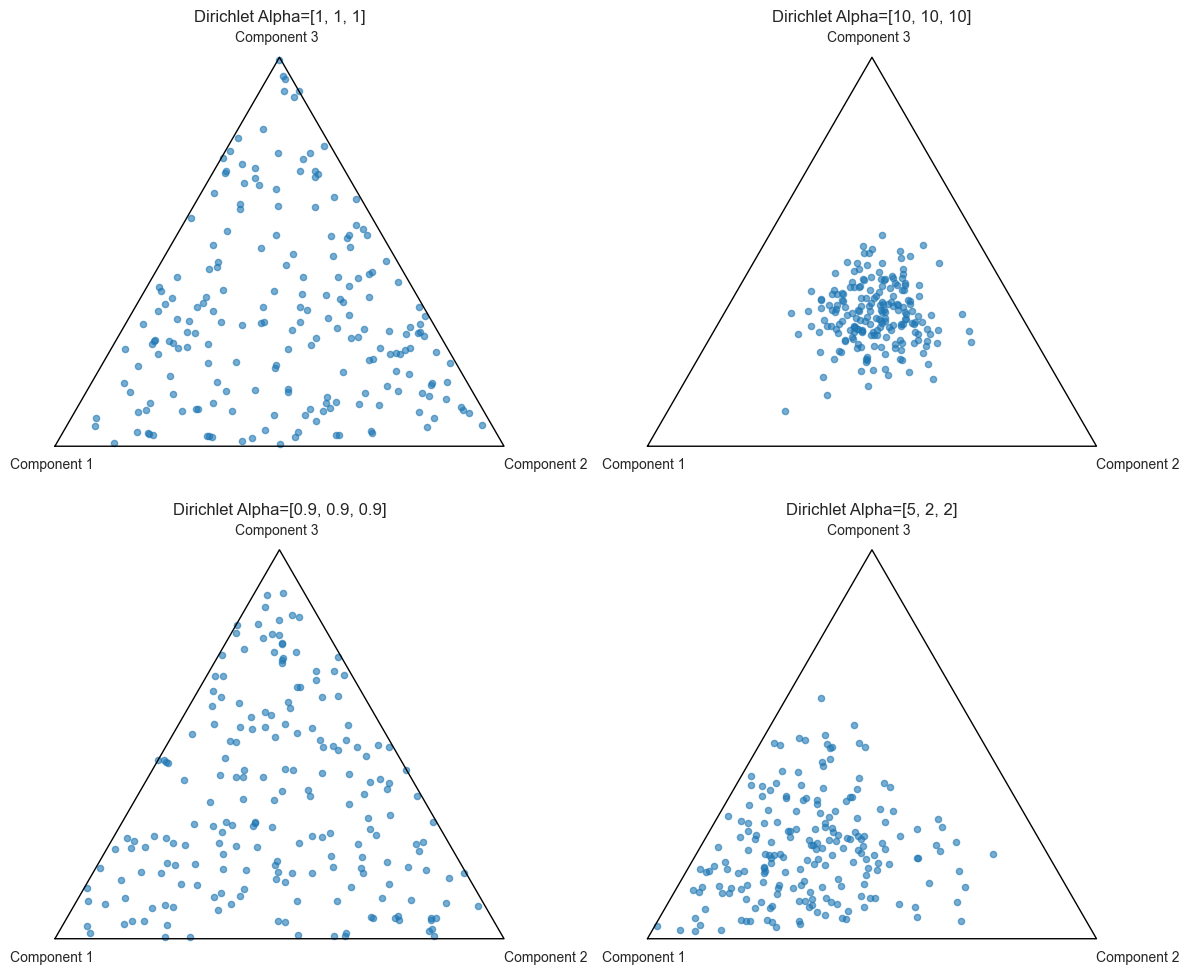

In [2]:
def visualize_dirichlet_3d():
    # We visualize a 3-component Dirichlet (K=3) on a 2D Simplex (Triangle)
    # Since x1 + x2 + x3 = 1, we only need to plot x1 and x2
    
    alpha_configurations = [
        [1, 1, 1],   # Uniform
        [10, 10, 10], # Concentrated in center
        [0.9, 0.9, 0.9], # Sparse (concentrated at corners)
        [5, 2, 2]    # Biased towards component 1
    ]
    
    print("Generating Dirichlet Samples (x1, x2, x3) where sum=1...")
    
    plt.figure(figsize=(12, 10))
    
    for i, alpha in enumerate(alpha_configurations):
        # Draw samples
        samples = dirichlet.rvs(alpha, size=200)
        
        # Barycentric coordinates for plotting on a triangle
        # (Projecting 3D simplex onto 2D plane)
        # Coordinate transformation:
        # X = 0.5 * (2*x2 + x3) / (x1+x2+x3) ... simplified for plotting
        # Just plotting x1 vs x2 is standard but triangle is better.
        
        # Simple visualization: Ternary Plot approximation
        # A = (0, 0), B = (1, 0), C = (0.5, sqrt(3)/2)
        A = np.array([0, 0])
        B = np.array([1, 0])
        C = np.array([0.5, np.sqrt(3)/2])
        
        # Project points
        # P = x1*A + x2*B + x3*C
        x1, x2, x3 = samples[:, 0], samples[:, 1], samples[:, 2]
        pts = np.outer(x1, A) + np.outer(x2, B) + np.outer(x3, C)
        
        plt.subplot(2, 2, i+1)
        plt.scatter(pts[:, 0], pts[:, 1], alpha=0.6, s=20)
        
        # Draw Triangle
        triangle = np.array([A, B, C, A])
        plt.plot(triangle[:, 0], triangle[:, 1], 'k-', lw=1)
        plt.text(-0.1, -0.05, "Component 1")
        plt.text(1.0, -0.05, "Component 2")
        plt.text(0.4, 0.9, "Component 3")
        
        plt.title(f"Dirichlet Alpha={alpha}")
        plt.axis('equal')
        plt.axis('off')

    plt.tight_layout()
    plt.show()

visualize_dirichlet_3d()

## Summary

With **Gaussian**, **Bernoulli**, **Binomial**, **Multinomial**, and **Dirichlet** now covered, we have completed the core probability distributions required for Syllabus Unit 1.1.

Next steps in the course will be **MLE (Maximum Likelihood Estimation)** and **MAP**, where we will use these distributions to estimate parameters from data.